# *Parcial Final*

## *Nicolás Patalagua*
### *Universidad Sergio Arboleda*

# **Scikit-learn**

[Scikit-learn](https://scikit-learn.org/) (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

# **Variables**

* EXAM1 -> Puntuación Examen 01 
* EXAM2 -> Puntuación Examen 02
* EXAM3 -> Puntuación Examen 03
* FINAL -> Puntuación Examen Final (Variable Target)


En primer lugar se cargan las bibliotecas con sus módulos correspondientes.


In [1]:
import numpy as np #Soporte para vectores y matrices
import pandas as pd #Manipulación y análisis de datos 
import seaborn as sns #Graficos elegantes 
import matplotlib.pyplot as plt #Diseño y realización de graficas
#incorporar las gráficas en este documento
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split #Dividir dataset en trenes aleatorios y subconjuntos de prueba
from sklearn.linear_model import LinearRegression #Regresión lineal de mínimos cuadrados ordinarios.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Error cuadratico medio, error absoluto medio y r2 score.

Se realiza la exploración y preparación del dataset.

In [92]:
#Exportamos el dataset
ObjData=pd.read_csv('data03.csv')
#Presentar la cabecera del dataset
ObjData.head()

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [93]:
#Presentar la cantidad de filas y columnas:
ObjData.shape

(103, 4)

In [94]:
#A las notas sin valor le asignamos una nota 0
ObjData.fillna(0)

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
...,...,...,...,...
98,74,83,89,161
99,99,75,79,159
100,95,75,75,157
101,72,95,74,158


In [95]:
#Exploramos un poco los datos
print("Información del dataset:\n")
ObjData.info()

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EXAM1   103 non-null    object
 1   EXAM2   103 non-null    object
 2   EXAM3   103 non-null    object
 3   FINAL   103 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [96]:
#Verificamos el tipo de dato de cada columna
ObjData.dtypes

EXAM1    object
EXAM2    object
EXAM3    object
FINAL     int64
dtype: object

In [0]:
#Convertir los objevt a int
ObjData["EXAM1"] = pd.to_numeric(ObjData["EXAM1"],errors='coerce')
ObjData["EXAM2"] = pd.to_numeric(ObjData["EXAM2"],errors='coerce')
ObjData["EXAM3"] = pd.to_numeric(ObjData["EXAM3"],errors='coerce')

In [98]:
ObjData.dtypes

EXAM1    float64
EXAM2    float64
EXAM3    float64
FINAL      int64
dtype: object

In [99]:
#Realizamos un resumen estadistico
print("Resumen estadístico:")
ObjData.describe().T

Resumen estadístico:


,count,mean,std,min,25%,50%,75%,max
EXAM1,102.0,79.421569,11.770441,45.0,73.00,79.5,87.0,107.0
EXAM2,100.0,78.270000,11.331421,46.0,70.75,78.0,87.0,103.0
EXAM3,98.0,79.581633,11.681268,49.0,73.00,77.5,90.0,106.0
FINAL,103.0,159.970874,26.345910,97.0,144.50,158.0,177.0,227.0


Realizamos los diagramas de dispersion de cada nota contra el target

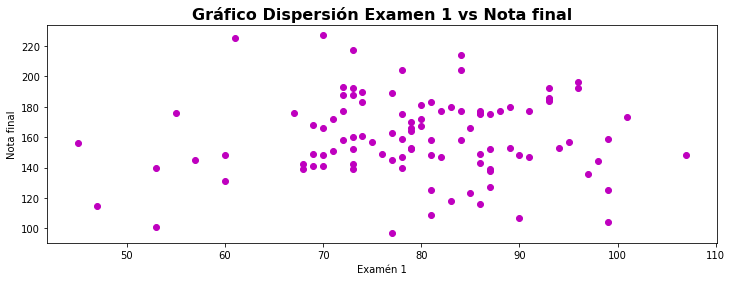

In [100]:
plt.figure(figsize=(12, 4))
plt.scatter(
    ObjData['EXAM1'],
    ObjData['FINAL'],
    c='m'
)
plt.title("Gráfico Dispersión Examen 1 vs Nota final", fontsize=16, fontweight='bold')
plt.xlabel("Examén 1")
plt.ylabel("Nota final")
plt.show()

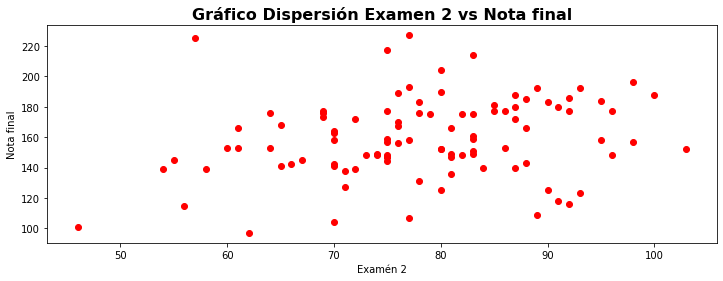

In [101]:
plt.figure(figsize=(12, 4))
plt.scatter(
    ObjData['EXAM2'],
    ObjData['FINAL'],
    c='r'
)
plt.title("Gráfico Dispersión Examen 2 vs Nota final", fontsize=16, fontweight='bold')
plt.xlabel("Examén 2")
plt.ylabel("Nota final")
plt.show()

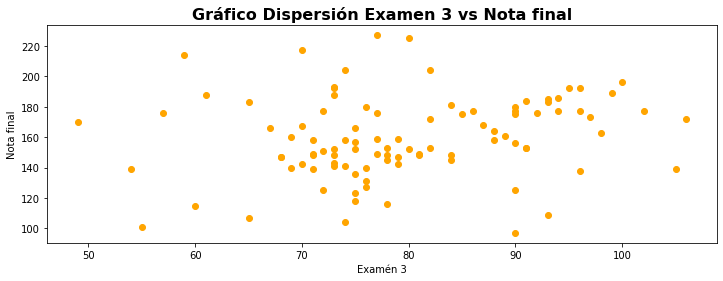

In [102]:
plt.figure(figsize=(12, 4))
plt.scatter(
    ObjData['EXAM3'],
    ObjData['FINAL'],
    c='orange'
)
plt.title("Gráfico Dispersión Examen 3 vs Nota final", fontsize=16, fontweight='bold')
plt.xlabel("Examén 3")
plt.ylabel("Nota final")
plt.show()

Los gráficos de dispersión se usan para trazar puntos de datos en un eje vertical y uno horizontal, mediante lo que se trata de mostrar cuánto afectan las variables EXAM1, EXAM2 y EXAM3 respecto a la nota final.

Realizar la grafica de dispersión par por variables

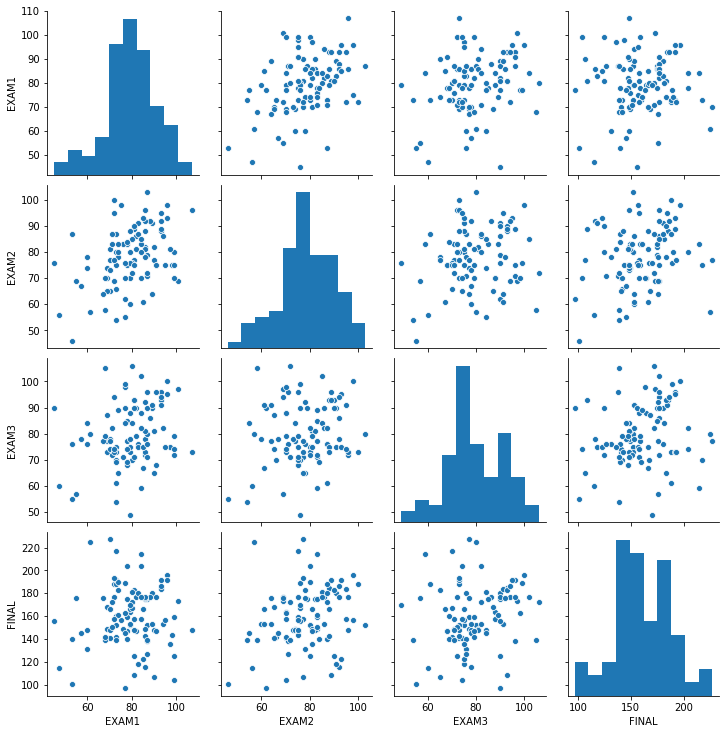

In [103]:
#Dispersion par por variables
sns.pairplot(ObjData)

En este caso se dice que las variables son incorreladas y la nube de puntos tiene una forma redondeada.

Realizamos la grafica de distribución

Gráfico de distribución


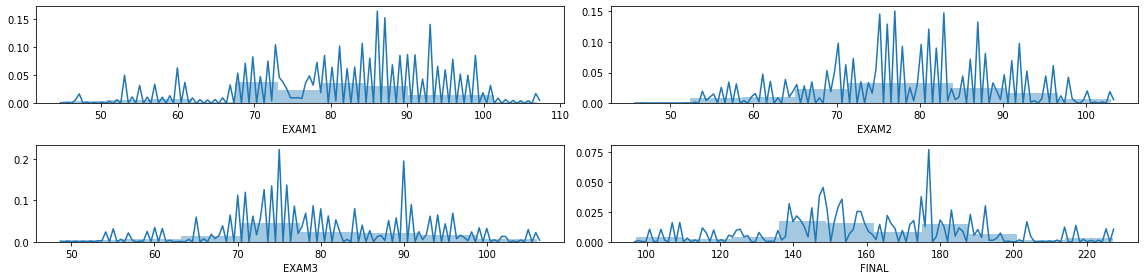

In [104]:
print('Gráfico de distribución')
filas = 2
columnas = 2
fig, ax = plt.subplots(nrows=filas, ncols=columnas, figsize=(16,4))
columna = ObjData.columns
index = 0
for i in range(filas):
    for j in range(columnas):
        sns.distplot(ObjData[columna[index]], ax = ax[i][j], kde_kws={'bw':0.1})
        index = index + 1
plt.tight_layout()

La gráfica de la distribución normal tiene la forma de una campana, por este motivo también es conocida como la campana de Gauss. En el gráfico, el área sombreada corresponde a la probabilidad de encontrar un valor de la variable que sea igual o inferior a un valor dado. 

Realizar la matriz de correlación

> La matriz de covarianzas muestra los valores de covarianza, que miden la relación lineal de cada par de elementos o variables.



In [105]:
#Matriz de Correlación
ObjMC=ObjData.corr()
ObjMC

,EXAM1,EXAM2,EXAM3,FINAL
EXAM1,1.000000,0.389820,0.262478,0.034589
EXAM2,0.389820,1.000000,0.149500,0.231203
EXAM3,0.262478,0.149500,1.000000,0.185858
FINAL,0.034589,0.231203,0.185858,1.000000


Realizamos el mapa de calor para representar la correlación

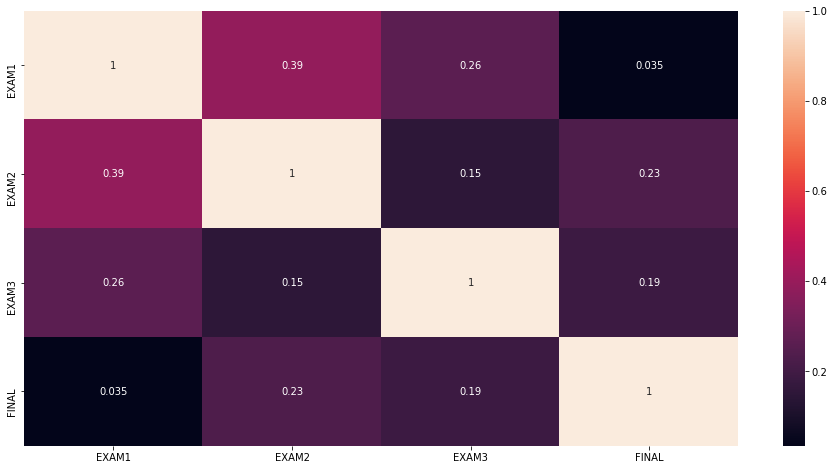

In [106]:
#Realizamos el mapa de calor
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(ObjMC, annot=True)

Un gráfico de calor se usa para visualizar la relación numérica existente entre las variables   EXAM1, EXAM2 y EXAM3 respecto a la nota final.

In [118]:
#Presentar el indice de la matriz de correlación
ObjMC.index

Index(['EXAM1', 'EXAM2', 'EXAM3', 'FINAL'], dtype='object')

In [132]:
ObjMC.dtypes

EXAM1    float64
EXAM2    float64
EXAM3    float64
FINAL    float64
dtype: object

Creamos el modelo de regresión lineal para predecir la nota final. Para estimar los coeficientes se usarña el método de Minimos cuadrados.

In [0]:
def relacionFeatures(correlacionData, umbral):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index]) > umbral:
            feature.append(index)
            valor.append(correlacionData[index])    
    df  = pd.DataFrame(data = valor, index = feature, columns=['Valor Correlación'])
    return df

In [151]:
#Realizamos el calculo del umbral 0.25
umbral = 0.25
valorCorrelacion = relacionFeatures(ObjMC['FINAL'], umbral)
valorCorrelacion

,Valor Correlación
FINAL,1.0


In [153]:
#Realizamos el calculo del umbral 0.75
umbral = 0.75
valorCorrelacion = relacionFeatures(ObjMC['FINAL'], umbral)
valorCorrelacion

,Valor Correlación
FINAL,1.0


In [134]:
#Representamos los datos de correlación correctos 
ObjDt = ObjMC[valorCorrelacion.index]
ObjDt.head()

,EXAM1,EXAM2,EXAM3,FINAL
EXAM1,1.000000,0.389820,0.262478,0.034589
EXAM2,0.389820,1.000000,0.149500,0.231203
EXAM3,0.262478,0.149500,1.000000,0.185858
FINAL,0.034589,0.231203,0.185858,1.000000


Ajustar el modelo de regresión lineal y predecir. Se realizara en torno a Exam 1 y a la nota final, y otro con Exam 2 y la nota final.

In [0]:
#Seleccionamos las variables dependiente e independiente
#Seleccionamos las variables dependiente e independiente
X = ObjData['EXAM1'].values.reshape(-1,1)
y = ObjData['FINAL'].values.reshape(-1,1)

In [0]:
# Selección a modelo lineal
ObjModelo = LinearRegression()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)